In [1]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model="gpt-4o-mini")
model.invoke("Hello, world!")

c:\Users\tjdfu\anaconda3\envs\chatbot\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 11, 'total_tokens': 20, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CTTHRovh7fWgaXeLDpj484XZ2VuD9', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--5a028f7b-9a7b-4a3a-9cb9-4bca640ebcb9-0', usage_metadata={'input_tokens': 11, 'output_tokens': 9, 'total_tokens': 20, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [2]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
    """
    State 클래스는 TypedDict를 상속받아 상태의 구조를 정의합니다.
    
    속성:
        messages (Annotated[list[str], add_messages]): 메세지들은 'list' 타입을 가집니다.
        'add_messages' 함순는 이 상태 키가 어떻게 업데이트되어야 하는지를 정의합니다.
        (이경우, 메세지를 덮어쓰는 대신 리스트에 추가합니다.)
    """
    messages: Annotated[list[str], add_messages]

graph_builder = StateGraph(State)

In [ ]:
from langchain_core.tools import tool
from datetime import datetime
import pytz
from langchain_community.tools import DuckDuckGoSearchResults
from langchain_community.utilities import DuckDuckGoSearchAPIWrapper

import bs4

from langchain_community.document_loaders import WebBaseLoader

@tool
def get_current_time(timezone: str, location: str) -> str:
    """주어진 시간대와 위치에 대한 현재 시간을 반환합니다."""
    try:
        tz = pytz.timezone(timezone)
        current_time = datetime.now(tz).strftime("%Y-%m-%d %H:%M:%S")
        result = f"The current time in {location} is {current_time}."
        return result
    except pytz.UnknownTimeZoneError:
        return "Unknown timezone. Please provide a valid timezone."
    
@tool
def web_search(query: str, search_period: str = 'm') -> str:
    """DuckDuckGo를 사용하여 웹 검색을 수행하고 결과를 반환합니다.

    Args:
        query (str): 검색 쿼리 문자열.
        search_period (str, optional): 검색 기간 필터. 기본값은 'm' (지난 한 달).
            가능한 값:
                'd' - 지난 하루
                'w' - 지난 일주일
                'm' - 지난 한 달
                'y' - 지난 1년
        Returns:
            str: 검색 결과 요약.     
    """
    
    wapper = DuckDuckGoSearchAPIWrapper(time=search_period)
    print('\n------ Web Search ------')
    print(f'Query: {query}, Period: {search_period}')


    search = DuckDuckGoSearchResults(api_wrapper=wapper, results_separator=';\n')
    searched = search.invoke(query)

    for i, result in enumerate(searched.split(';\n')):
        print(f'Result {i+1}: {result}\n')
    return searched

tools = [get_current_time, web_search]

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [4]:
tools[0].invoke({"timezone":"Asia/Seoul", "location":"서울"})

'The current time in 서울 is 2025-10-22 22:35:02.'

In [5]:
tools[1].invoke({"query":"스쿼트", "search_period":"m"})


------ Web Search ------
Query: 스쿼트, Period: m
Result 1: snippet: 2021. 10. 9. - Pinterest에서 Hannah Cha님의 보드 " 스쿼트 "을(를) 팔로우하세요. 스쿼트 , 운동법, 피트니스 운동에 관한 아이디어를 더 확인해 보세요., title: 20개의 스쿼트 아이디어 | 스쿼트 , 운동법, 피트니스 운동, link: https://tr.pinterest.com/hanahwj/스쿼트/

Result 2: snippet: 스쿼트 . 낭만직딩. Плейлист • 6 видео • 158 просмотров., title: 스쿼트 - YouTube, link: https://www.youtube.com/playlist?list=PL_tFytP4EsO7g9xZzCvgmvPXZGnOvMBn7

Result 3: snippet: 살 제일 빨리빠지는 덤벨 스쿼트 루틴 3가지 스쿼트는 체지방연소시키고 근육량 늘리는데 가장 효과적인 운동이에요! 체지방 연소에 효과적인 덤벨 스쿼트 루틴 3가지를 소개합니다., title: 타미미 스쿼트 | TikTok, link: https://www.tiktok.com/discover/타미미-스쿼트

Result 4: snippet: 바벨 스쿼트 . V Squat. 브이 스쿼트 . Leg Extension. 레그 익스텐션., title: 덤벨 불가리안 스플릿 스쿼트 - 자세, 팁, 자극부위 등, link: https://planfit.ai/ko/exercise/dumbbell-bulgarian-split-squat



'snippet: 2021. 10. 9. - Pinterest에서 Hannah Cha님의 보드 " 스쿼트 "을(를) 팔로우하세요. 스쿼트 , 운동법, 피트니스 운동에 관한 아이디어를 더 확인해 보세요., title: 20개의 스쿼트 아이디어 | 스쿼트 , 운동법, 피트니스 운동, link: https://tr.pinterest.com/hanahwj/스쿼트/;\nsnippet: 스쿼트 . 낭만직딩. Плейлист • 6 видео • 158 просмотров., title: 스쿼트 - YouTube, link: https://www.youtube.com/playlist?list=PL_tFytP4EsO7g9xZzCvgmvPXZGnOvMBn7;\nsnippet: 살 제일 빨리빠지는 덤벨 스쿼트 루틴 3가지 스쿼트는 체지방연소시키고 근육량 늘리는데 가장 효과적인 운동이에요! 체지방 연소에 효과적인 덤벨 스쿼트 루틴 3가지를 소개합니다., title: 타미미 스쿼트 | TikTok, link: https://www.tiktok.com/discover/타미미-스쿼트;\nsnippet: 바벨 스쿼트 . V Squat. 브이 스쿼트 . Leg Extension. 레그 익스텐션., title: 덤벨 불가리안 스플릿 스쿼트 - 자세, 팁, 자극부위 등, link: https://planfit.ai/ko/exercise/dumbbell-bulgarian-split-squat'

In [6]:
model_whit_tools = model.bind_tools(tools)

def generate(state: State):
    """
    주어진 상태를 기반으로 챗봇의 응답 메세지를 생성합니다.
    Args:
        state (State): 현재 상태를 나타내는 State 객체, 이전 메시지들이 포함되어 있습니다.
    Returns:
        dict: 모델이 생성한 응답 메세지를 포함하는 딕셔너리
            형식은 {"messages":[응답 메세지]} 입니다.

    """
    return {"messages": model_whit_tools.invoke(state["messages"])}

graph_builder.add_node("generate", generate)

In [7]:
import json
from langchain_core.messages import ToolMessage

class BasicToolNode:
    """
    도구를 실행하는 노드 클래스입니다. 마지막 AIMessage에서 요청된 도구를 실행합니다.
    Attrubutes:
        tools_by_name (dict): 도구 이름을 키로, 도구의 객체를 값으로 가지는 사전입니다.
    methods:
        __init__(tools: list): 도구 객체들의 리스트를 받아 초기화합니다.
        __call__(inputs: dict): 입력 메세지를 받아서 도구를 실행하고 결과 메시지를 반환합니다.
    """
    """A node that runs the tool requested in the last AIMessage."""

    def __init__(self, tools: list) -> None:
        self.tools_by_name = {tool.name: tool for tool in tools}

    def __call__(self, inputs: dict) -> dict:
        if messages := inputs.get("messages", []):
            message = messages[-1]
        else:
            raise ValueError("No messages found in inputs")
        outputs = []
        for tool_call in message.get_tool_calls():
            tool_result = self.tools_by_name[tool_call.name].invoke(tool_call['args'])
            outputs.append(ToolMessage(
                contnet=json.dumps(tool_result), name=tool_call['name'], tool_call_id = tool_call[id], 
                )
            )
        return {"messages": messages + outputs}
    
tool_node = BasicToolNode(tools)
graph_builder.add_node("tools", tool_node)

In [8]:
def route_tools(state: State):
    """
    마지막 메세지에 도구 호출이 있는 경우 ToolNode로 라우팅하고,
    그렇지 않은 겨우 끝으로 라우팅하기 위해 conditional_edge에서 사용합니다.
    """

    if isinstance(state, list):
        ai_message = state[-1]
    elif messages := state.get("messages", []):
        ai_message = messages[-1]
    else:
        raise ValueError(f"No messages found in {state}")
    if hasattr(ai_message, 'tool_calss') and len(ai_message.tool_calls) > 0:
        return "tools"
    return END

graph_builder.add_edge(START, "generate")

graph_builder.add_conditional_edges(
    "generate", 
    route_tools,
    {"tools": "tools", END: END}
)
graph_builder.add_edge("tools", "generate")
graph = graph_builder.compile()


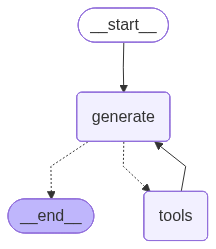

In [9]:
from IPython.display import display, Image

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [16]:
from langchain_core.messages import AIMessageChunk, HumanMessage

inputs = [HumanMessage(content="지금 서울의 시간은 몇시야?")]

gathered = None

for msg, metadate in graph.stream({"messages": inputs}, stream_mode="messages"):
    if isinstance(msg, AIMessageChunk):
        print(msg.content, end="")
    if gathered is None:
        gathered = msg
    else:
        gathered = gathered + msg

gathered



AIMessageChunk(content='', additional_kwargs={}, response_metadata={'model_provider': 'openai', 'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'service_tier': 'default'}, id='lc_run--e0f3cce0-50ea-4cca-b31a-634a84ac1bb7', tool_calls=[{'name': 'get_current_time', 'args': {'timezone': 'Asia/Seoul', 'location': 'Seoul'}, 'id': 'call_kG4ohAe4udq1OhUNolKr9jmH', 'type': 'tool_call'}], usage_metadata={'input_tokens': 193, 'output_tokens': 23, 'total_tokens': 216, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}, tool_call_chunks=[{'name': 'get_current_time', 'args': '{"timezone":"Asia/Seoul","location":"Seoul"}', 'id': 'call_kG4ohAe4udq1OhUNolKr9jmH', 'index': 0, 'type': 'tool_call_chunk'}], chunk_position='last')